In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
def findClosestCentroids(X, centroids):
    m = len(X)
    k = len(centroids)
    idx = np.zeros(m)
    for i in range(m):
        minDist = 1000000
        for j in range(k):
            dist = np.sum((X[i] - centroids[j]) ** 2) # 各维度差值的平方和
            if dist < minDist:
                minDist = dist
                idx[i] = j
    return idx

In [3]:
data = loadmat('ex7data2.mat')
X = data['X']
initialCentroids = np.array(([3, 3], [6, 2], [8, 5]))
idx = findClosestCentroids(X, initialCentroids)
idx[0: 3]

array([0., 2., 1.])

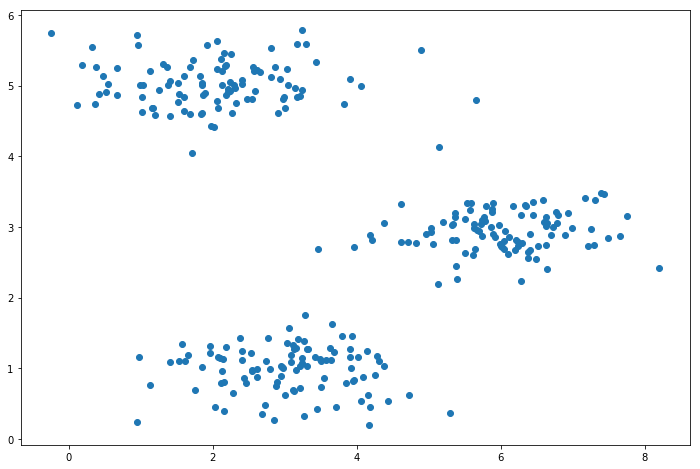

In [4]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
def computeCentroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    for i in range(k):
        index = np.where(idx == i) # np.where返回的是元组中一个列表，所以下面要除以len(index[0])
        centroids[i,:] = (np.sum(X[index,:], axis = 1) / len(index[0])).ravel() # 在各维度上相加求平均
        
    return centroids

In [6]:
computeCentroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [7]:
def K_means(X, centroids, iters):
    m, n = X.shape
    k = len(centroids)
    idx = np.zeros(m)
    for i in range(iters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, k)
    return idx, centroids

In [8]:
idx, centroids = K_means(X, initialCentroids, 10)

In [9]:
def initCentroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

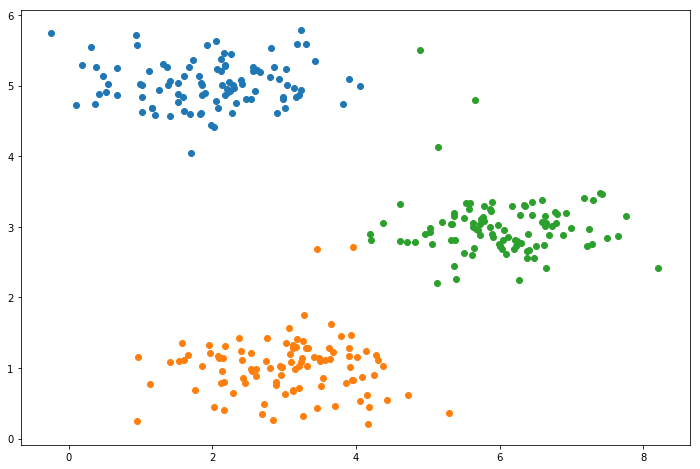

In [10]:
fig, ax = plt.subplots(figsize = (12, 8))
for i in range(3):
    cluster = X[np.where(idx == i)]
    ax.scatter(cluster[:,0], cluster[:,1])
plt.show()

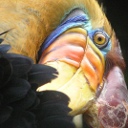

In [11]:
from IPython.display import Image
Image(filename = 'bird_small.png')

In [12]:
data = loadmat('bird_small.mat')
image = data['A']
image.shape

(128, 128, 3)

In [13]:
image = image / 255
X = np.reshape(image, (image.shape[0] * image.shape[1], image.shape[2]))
X.shape

(16384, 3)

In [14]:
initialCentroids = initCentroids(X, 16)
idx, centroids = K_means(X, initialCentroids, 10)
idx = findClosestCentroids(X, centroids)

In [15]:
Xrecovered = centroids[idx.astype('int'),:]
Xrecovered.shape

(16384, 3)

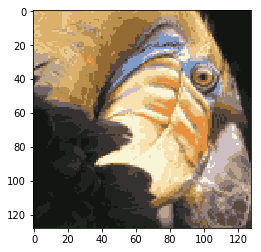

In [16]:
plt.imshow(np.reshape(Xrecovered, (image.shape[0], image.shape[1], image.shape[2])))
plt.show()